In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#statistics
from scipy import stats
import statsmodels.api as sm

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#miscellaneous
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset
leads=pd.read_csv('Leads.csv')

In [5]:
#Show the initial few rows of dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# check the shape of dataset
leads.shape

(9240, 37)

In [9]:
# enlisting all the columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# checking the summary of these columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
# checking the info for datatypes and null values count
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning and Data Preparation

In [13]:
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

#### Many columns have a high number of missing values which can be eliminated as these columns would not help in the analysis. Eliminating rows having missing values more than 3000.

In [14]:
# Droping columns with missing values more than 3000
for c in leads.columns:
    if leads[c].isnull().sum()>3000:
        leads.drop(c, axis=1,inplace=True)

In [16]:
# checking the dataset post this operation
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [17]:
#checking value counts of "City" column
leads['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [18]:
#checking value counts of "Country" column
leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

##### The maximum number of leads are from the country india and city mumbai. Once we have gathered this information we won't need them in our model. Dropping these columns to make the dataset more easy to read and model.

In [19]:
# dropping the "City" feature
leads.drop(['City'], axis = 1, inplace = True)

In [20]:
# dropping the "Country" feature
leads.drop(['Country'], axis = 1, inplace = True)

In [21]:
#checking the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [23]:
# checking the value counts of all the columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Columns 'Lead profile' and 'How did you hear about X Education' have a lot of rows having select which indicates these leads haven't selected any option which is of no use for the dataset. So we would drop these as well

In [24]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Many columns have a high value count for a single entry 'No'. These columns would also not help much, so dropping them as well

In [25]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Dropping 'What matters most to you in choosing a course' as it has data imbalance having most fo the rows for a single type of value.

In [26]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [27]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

The column 'What is your current occupation' has a lot of null values, but we can't drop it as it is an important attribute and we have already dropped a lot of columns so we would drop the empty rows from this column.

In [28]:
# Dropping the null values rows in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

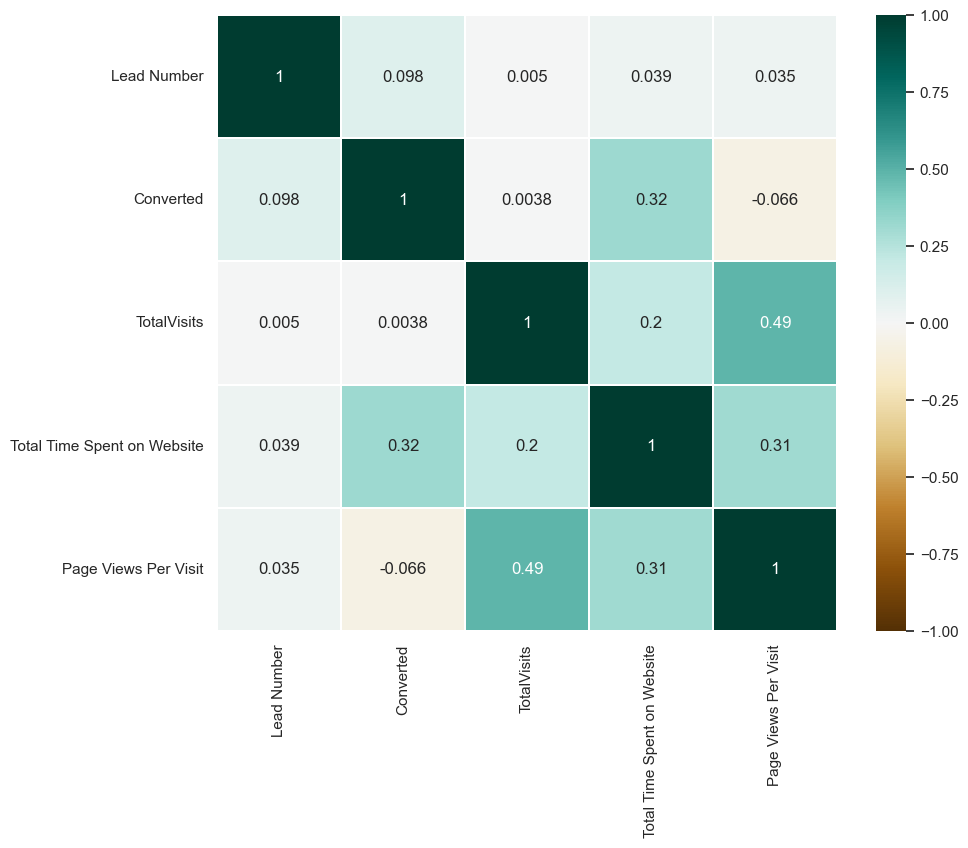

In [31]:
# Observing correlation on a heatmap

# Step 1: Identify and select numeric columns
numeric_columns = leads.select_dtypes(include=[np.number]).columns
leads_numeric = leads[numeric_columns]

# Step 2: Calculate the correlation matrix
corr_matrix = leads_numeric.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="BrBG", robust=True, linewidth=0.1, vmin=-1, vmax=1)
plt.show()

#### Analysing Categorical Variables

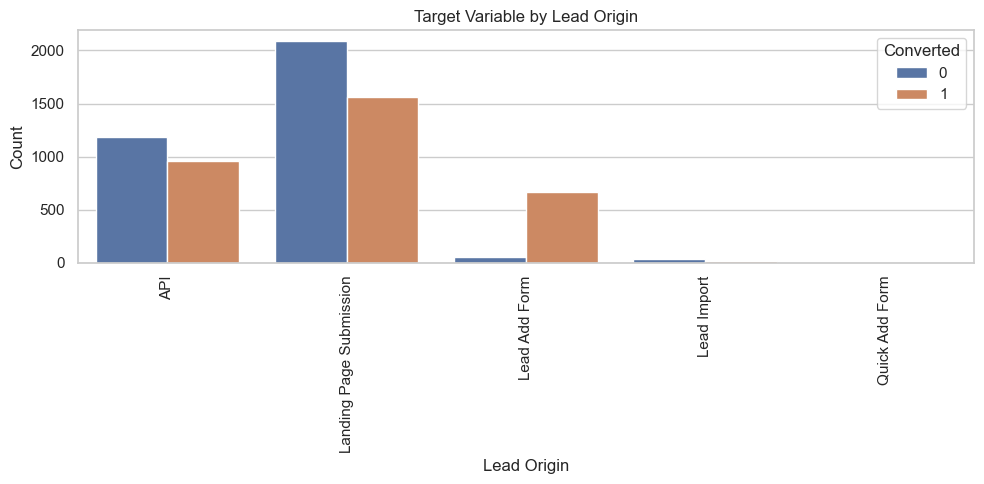

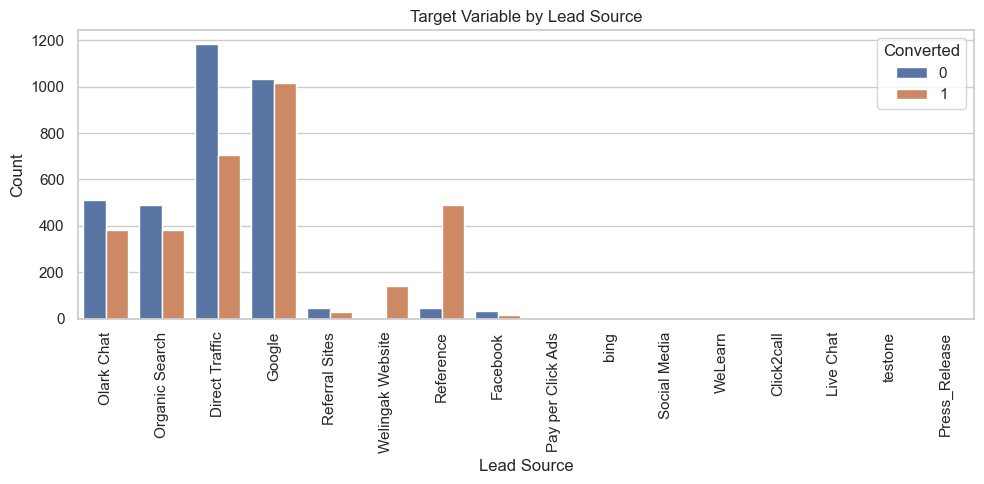

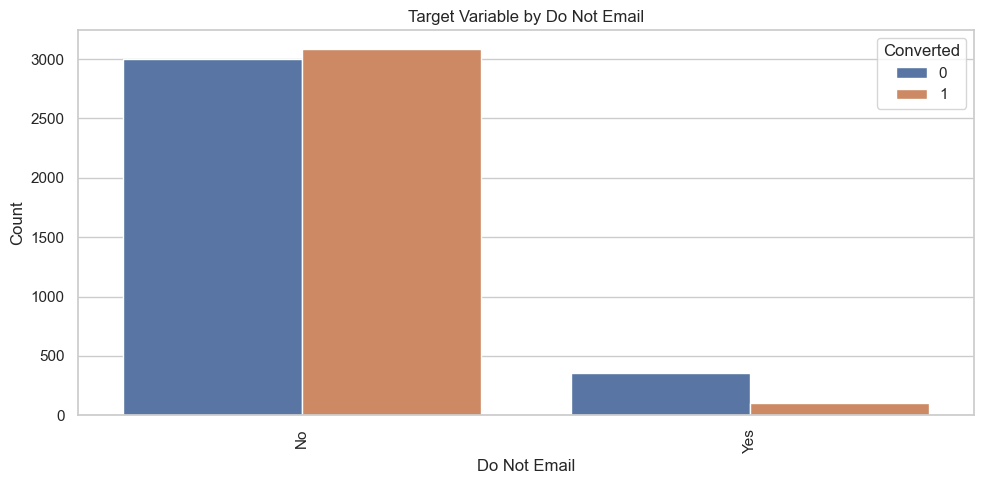

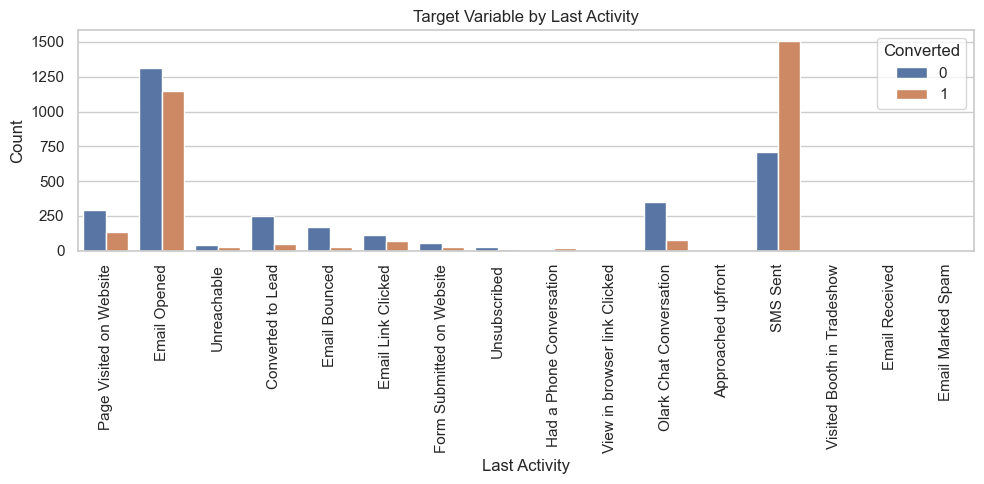

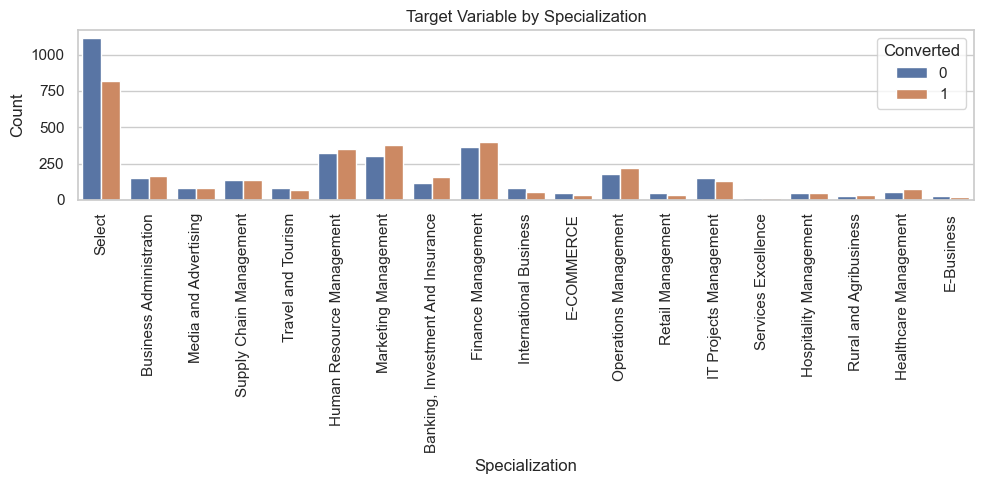

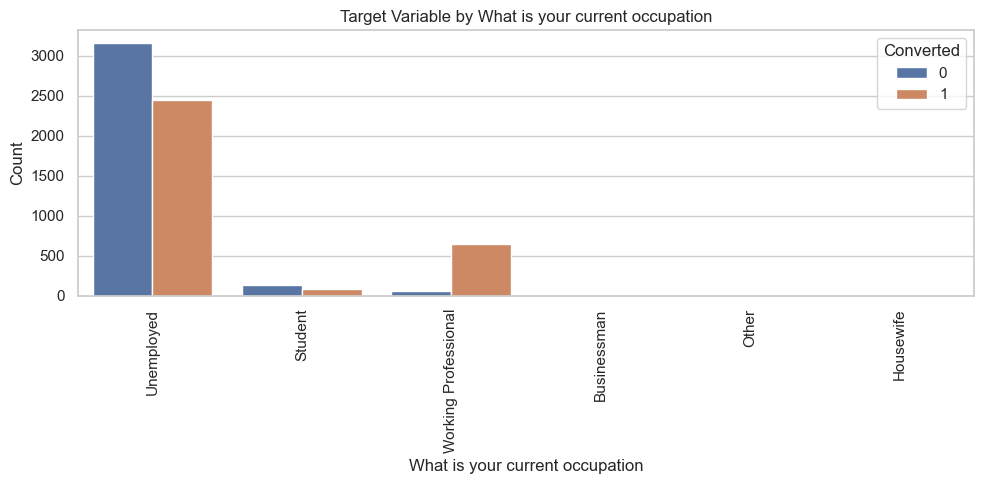

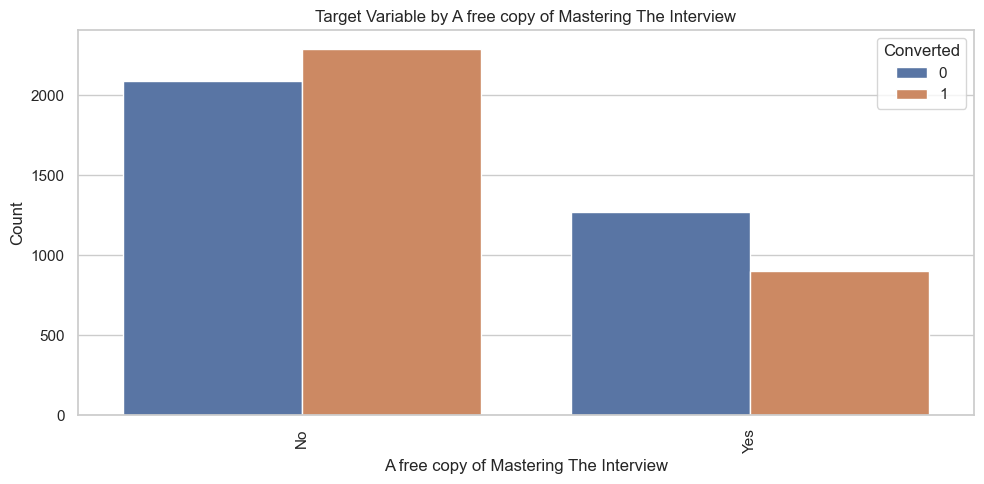

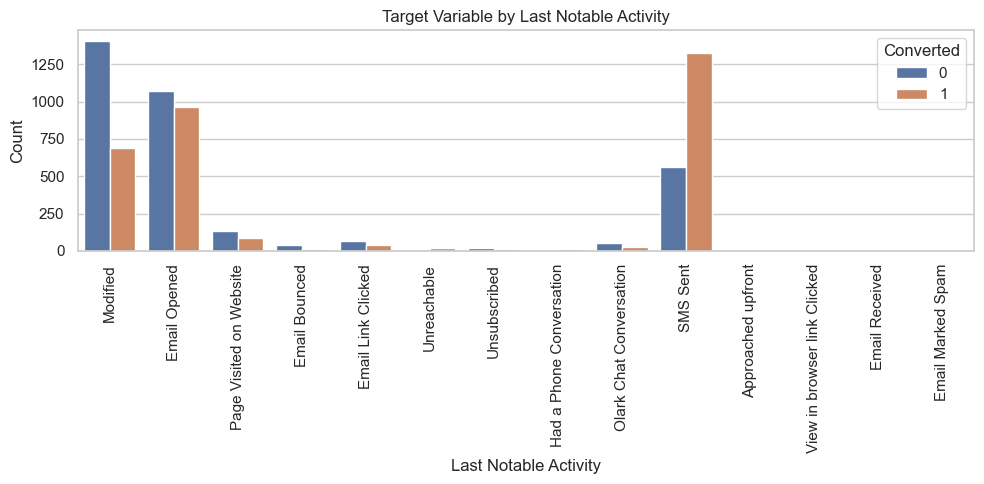

In [36]:
%matplotlib inline

# Identify categorical columns
categorical_cols = leads.select_dtypes(include="object").columns

# Define a maximum number of unique values to consider for plotting
max_unique_values = 50

# Filter columns with unique values within the limit
cols_to_plot = [col for col in categorical_cols if leads[col].nunique() < max_unique_values]

# Plot and display plots
for col in cols_to_plot:
    plt.figure(figsize=(10, 5))  # Adjust size for better readability
    sns.countplot(data=leads, x=col, hue='Converted')
    plt.xticks(rotation=90)
    plt.title(f'Target Variable by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()  # Adjust layout to fit labels and titles
    plt.show()  # Display plot interactively


In [37]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

The number of null values in these columns are quite less, so these rows can be dropped.

In [38]:
# Dropping the null values rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [39]:
# Dropping the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [40]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [41]:
# Drop the null values rows in the column 'Page Views Per Visit'

leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

In [42]:
# Drop the null values rows in the column 'Last Activity'

leads = leads[~pd.isnull(leads['Last Activity'])]

In [43]:
# Checking the number of null values now
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

The data is completely clean now, Let's check the percentage of rows retained

In [44]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


69% rows are still present which is a significant number for analysis

In [46]:
# Let's check the databse again
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [48]:
# Dropping the "Prospect ID" and "Lead Number" as they won't be used in the modeling
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [49]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Dummy variable creation

The next step is to dealing with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [50]:
# Checking the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [51]:
# Demo Cell
df = pd.DataFrame({'P': ['p', 'q', 'p']})
df

,P
0,p
1,q
2,p


In [52]:
pd.get_dummies(df)

,P_p,P_q
0,True,False
1,False,True
2,True,False


In [53]:
pd.get_dummies(df, prefix=['col1'])

,col1_p,col1_q
0,True,False
1,False,True
2,True,False


In [54]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [58]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 

dummy_spl = pd.get_dummies(leads['Specialization'], prefix='Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis=1)

KeyError: 'Specialization'

In [57]:
# Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [61]:
# checking the dataset again

leads.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Tru

### Test-Train Split

In [63]:
# Put all the feature variables in X

X = leads.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,Fals

In [64]:
y = leads['Converted']

y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [66]:
# Checking the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 74)
y_train Size (4461,)


### Scaling

In [67]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Fa

### Looking at the correlations

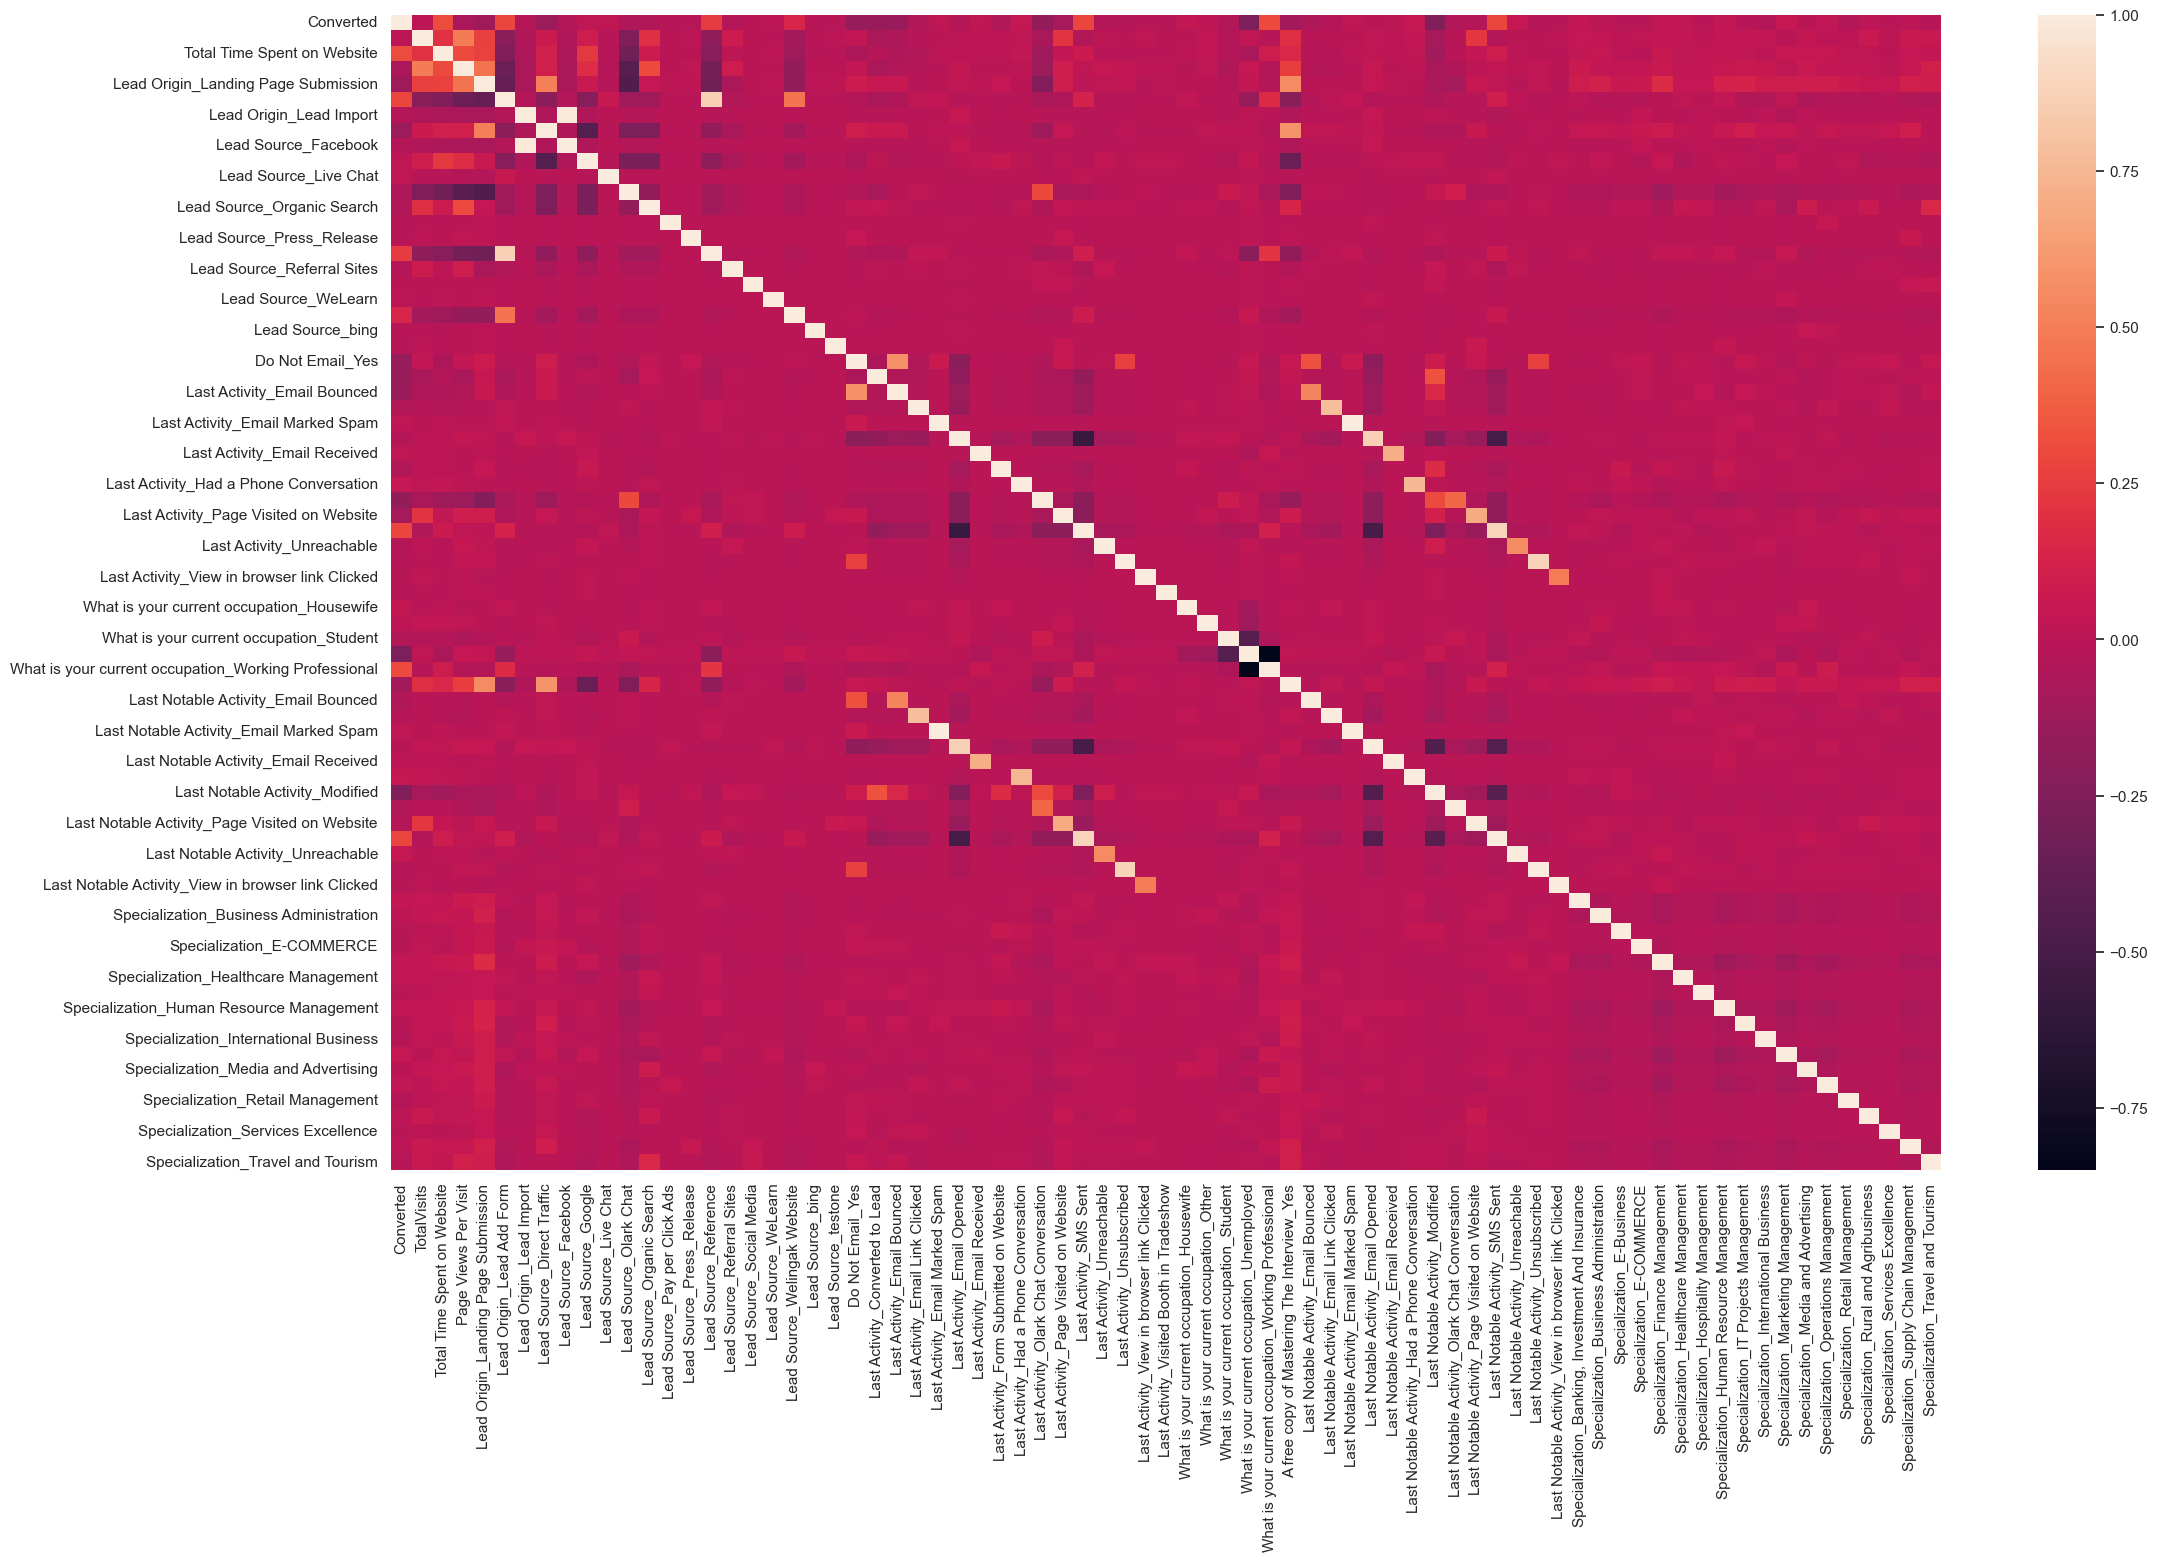

In [69]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

## Model Building

Selecting a small set of features using RFE to deal with a large number of features

In [70]:
# Creating a LogisticRegression object
logreg = LogisticRegression()

In [72]:
# Importing the 'RFE' and select 15 variables

rfe = RFE(estimator=logreg, n_features_to_select=15)            # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [73]:
# checking which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [74]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now using these columns to create logistic regression model using statsmodels

In [75]:
# Select only the columns selected by RFE

X_train = X_train[col]

### Model 1

In [78]:
X_train = X_train.astype(int)

y_train = y_train.astype(float)

In [79]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2439.8
Date:                Tue, 17 Sep 2024   Deviance:                       4879.6
Time:                        03:24:48   Pearson chi2:                 4.86e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2526
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8200      0.555      1.477      0.140      -0.268       1.908
TotalVisits                                             24.3717   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Total Time Spent on Website                            -23.9635   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form                                1.7919      1.143      1.568      0.117      -0.447       4.031
Lead Source_Olark Chat                                   0.0844      0.096      0.883      0.377      -0.103       0.272
Lead Source_Reference                                    1.0181      1.169      0.871      0.384      -1.273       3.309
Lead Source_Welingak Website                             3.0971      1.523      2.033      0.042       0.112       6.082
Do Not Email_Yes                                        -1.5332      0.175     -8.765      0.000      -1.876      -1.190
Last Activity_Had a Phone Conversation                   1.2781      0.892      1.432      0.152      -0.471       3.027
Last Activity_SMS Sent                                   1.2031      0.074     16.238      0.000       1.058       1.348
What is your current occupation_Housewife               22.3208    2.6e+04      0.001      0.999   -5.09e+04    5.09e+04
What is your current occupation_Student                 -1.4375      0.587     -2.447      0.014      -2.589      -0.286
What is your current occupation_Unemployed              -1.6256      0.557     -2.920      0.003      -2.717      -0.534
What is your current occupation_Working Professional     1.0820      0.585      1.849      0.064      -0.065       2.229
Last Notable Activity_Had a Phone Conversation          22.9068   2.41e+04      0.001      0.999   -4.73e+04    4.73e+04
Last Notable Activity_Unreachable                        2.3601      0.776      3.042      0.002       0.839       3.881
========================================================================================================================
"""

#### Checking VIF

In [80]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.13
4,Lead Source_Reference,65.13
5,Lead Source_Welingak Website,20.01
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
11,What is your current occupation_Unemployed,1.74
8,Last Activity_SMS Sent,1.58
12,What is your current occupation_Working Professional,1.22
3,Lead Source_Olark Chat,1.19
6,Do Not Email_Yes,1.08


VIFs are in a decent range except for three variables.

Dropping first the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

In [81]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

### Model 2

In [82]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2440.1
Date:                Tue, 17 Sep 2024   Deviance:                       4880.2
Time:                        03:29:06   Pearson chi2:                 4.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2525
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8203      0.555      1.478      0.139      -0.267       1.908
TotalVisits                                             24.3717   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Total Time Spent on Website                            -23.9637   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form                                2.7756      0.246     11.301      0.000       2.294       3.257
Lead Source_Olark Chat                                   0.0831      0.096      0.870      0.385      -0.104       0.270
Lead Source_Welingak Website                             2.1131      1.036      2.039      0.041       0.082       4.144
Do Not Email_Yes                                        -1.5322      0.175     -8.764      0.000      -1.875      -1.190
Last Activity_Had a Phone Conversation                   1.2780      0.892      1.432      0.152      -0.471       3.027
Last Activity_SMS Sent                                   1.2033      0.074     16.241      0.000       1.058       1.348
What is your current occupation_Housewife               22.3217    2.6e+04      0.001      0.999   -5.09e+04    5.09e+04
What is your current occupation_Student                 -1.4365      0.587     -2.446      0.014      -2.588      -0.285
What is your current occupation_Unemployed              -1.6259      0.557     -2.921      0.003      -2.717      -0.535
What is your current occupation_Working Professional     1.0824      0.585      1.850      0.064      -0.064       2.229
Last Notable Activity_Had a Phone Conversation          22.9070   2.41e+04      0.001      0.999   -4.73e+04    4.73e+04
Last Notable Activity_Unreachable                        2.3606      0.776      3.043      0.002       0.840       3.881
========================================================================================================================
"""

Checking VIF

In [83]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
10,What is your current occupation_Unemployed,1.74
7,Last Activity_SMS Sent,1.58
2,Lead Origin_Lead Add Form,1.50
4,Lead Source_Welingak Website,1.33
11,What is your current occupation_Working Professional,1.22
3,Lead Source_Olark Chat,1.19
5,Do Not Email_Yes,1.08
9,What is your current occupation_Student,1.02


The VIFs are now all less than 5. So dropping the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.

In [84]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model 3

In [85]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2442.4
Date:                Tue, 17 Sep 2024   Deviance:                       4884.8
Time:                        03:31:07   Pearson chi2:                 4.84e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2517
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8202      0.555      1.478      0.139      -0.268       1.908
TotalVisits                                             23.3718   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Total Time Spent on Website                            -22.9636   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                2.7758      0.246     11.302      0.000       2.294       3.257
Lead Source_Olark Chat                                   0.0843      0.096      0.882      0.378      -0.103       0.272
Lead Source_Welingak Website                             2.1131      1.036      2.039      0.041       0.082       4.144
Do Not Email_Yes                                        -1.5320      0.175     -8.764      0.000      -1.875      -1.189
Last Activity_Had a Phone Conversation                   2.6108      0.763      3.421      0.001       1.115       4.107
Last Activity_SMS Sent                                   1.2033      0.074     16.242      0.000       1.058       1.348
What is your current occupation_Housewife               21.3216   1.58e+04      0.001      0.999   -3.09e+04    3.09e+04
What is your current occupation_Student                 -1.4368      0.587     -2.446      0.014      -2.588      -0.285
What is your current occupation_Unemployed              -1.6259      0.557     -2.921      0.003      -2.717      -0.535
What is your current occupation_Working Professional     1.0808      0.585      1.847      0.065      -0.066       2.227
Last Notable Activity_Unreachable                        2.3607      0.776      3.043      0.002       0.840       3.881
========================================================================================================================
"""

Dropping the column 'What is your current occupation_Housewife' as having high P value

In [86]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

### Model 4

In [87]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2444.2
Date:                Tue, 17 Sep 2024   Deviance:                       4888.5
Time:                        03:32:14   Pearson chi2:                 4.85e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2511
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2739      0.518      2.459      0.014       0.259       2.289
TotalVisits                                             21.3716   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent on Website                            -20.9639   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                                2.7772      0.246     11.310      0.000       2.296       3.259
Lead Source_Olark Chat                                   0.0835      0.096      0.874      0.382      -0.104       0.271
Lead Source_Welingak Website                             2.1118      1.036      2.038      0.042       0.081       4.143
Do Not Email_Yes                                        -1.5354      0.175     -8.779      0.000      -1.878      -1.193
Last Activity_Had a Phone Conversation                   2.6106      0.763      3.421      0.001       1.115       4.106
Last Activity_SMS Sent                                   1.2033      0.074     16.241      0.000       1.058       1.349
What is your current occupation_Student                 -1.8903      0.553     -3.420      0.001      -2.973      -0.807
What is your current occupation_Unemployed              -2.0795      0.520     -4.000      0.000      -3.098      -1.061
What is your current occupation_Working Professional     0.6274      0.550      1.140      0.254      -0.451       1.706
Last Notable Activity_Unreachable                        2.3519      0.777      3.028      0.002       0.830       3.874
========================================================================================================================
"""

Droppin column 'What is your current occupation_Working Professional' as it has high P value

In [88]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

### Model 5

In [90]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2444.8
Date:                Tue, 17 Sep 2024   Deviance:                       4889.7
Time:                        03:33:45   Pearson chi2:                 4.81e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2509
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.8404      0.175     10.506      0.000       1.497       2.184
TotalVisits                                   21.3727   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent on Website                  -20.9653   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                      2.7784      0.246     11.315      0.000       2.297       3.260
Lead Source_Olark Chat                         0.0846      0.096      0.885      0.376      -0.103       0.272
Lead Source_Welingak Website                   2.1106      1.036      2.037      0.042       0.080       4.141
Do Not Email_Yes                              -1.5348      0.175     -8.783      0.000      -1.877      -1.192
Last Activity_Had a Phone Conversation         2.6128      0.763      3.424      0.001       1.117       4.108
Last Activity_SMS Sent                         1.2058      0.074     16.292      0.000       1.061       1.351
What is your current occupation_Student       -2.4576      0.259     -9.493      0.000      -2.965      -1.950
What is your current occupation_Unemployed    -2.6470      0.178    -14.911      0.000      -2.995      -2.299
Last Notable Activity_Unreachable              2.3473      0.777      3.020      0.003       0.824       3.871
==============================================================================================================
"""

Checking final VIF

In [91]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,1.65
7,Last Activity_SMS Sent,1.44
2,Lead Origin_Lead Add Form,1.39
4,Lead Source_Welingak Website,1.30
3,Lead Source_Olark Chat,1.18
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.02
0,TotalVisits,1.00
1,Total Time Spent on Website,1.00
6,Last Activity_Had a Phone Conversation,1.00


## Model Evaluation

The p-values and VIF's seem to be optimised. Now prediction can be made using the final set of features.

In [93]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.598502
218     0.308619
4171    0.308619
4037    0.326951
3660    0.959985
207     0.308619
2044    0.308619
6411    0.863000
6498    0.104154
2085    0.983413
dtype: float64

In [94]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.59850242, 0.30861868, 0.30861868, 0.32695067, 0.95998508,
       0.30861868, 0.30861868, 0.86300004, 0.10415367, 0.98341321])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [95]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.598502
1,0.0,0.308619
2,1.0,0.308619
3,1.0,0.326951
4,1.0,0.959985


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [96]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.598502,1
1,0.0,0.308619,0
2,1.0,0.308619,0
3,1.0,0.326951,0
4,1.0,0.959985,1


We have the probailities adn also the conversion predictions, we can now evaluate the model.

### Creating Confusion Matrix

In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1837  475]
 [ 763 1386]]


In [99]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7224837480385564


In [100]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.6449511400651465

In [103]:
# Calculating the 'specificity'

TN/(TN+FP)

0.7945501730103807

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [104]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

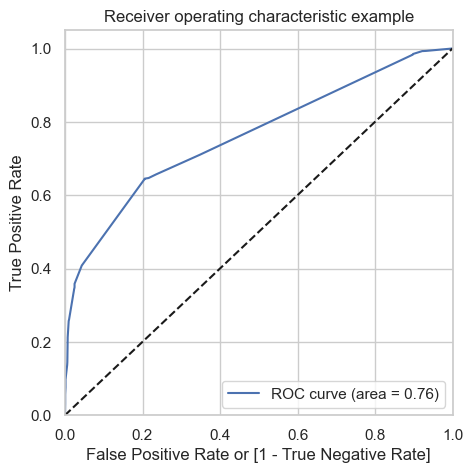

In [106]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under curve is 0.76 which is decent enough. The model is working fine.

In [107]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.598502,1,1,1,1,1,1,1,0,0,0,0
1,0.0,0.308619,0,1,1,1,1,0,0,0,0,0,0
2,1.0,0.308619,0,1,1,1,1,0,0,0,0,0,0
3,1.0,0.326951,0,1,1,1,1,0,0,0,0,0,0
4,1.0,0.959985,1,1,1,1,1,1,1,1,1,1,1


In [108]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.517597  0.993020  0.075692
0.2   0.2  0.518718  0.993020  0.077855
0.3   0.3  0.526788  0.983248  0.102509
0.4   0.4  0.722484  0.644951  0.794550
0.5   0.5  0.722484  0.644951  0.794550
0.6   0.6  0.692446  0.408097  0.956747
0.7   0.7  0.673616  0.349000  0.975346
0.8   0.8  0.673616  0.349000  0.975346
0.9   0.9  0.614660  0.207538  0.993080


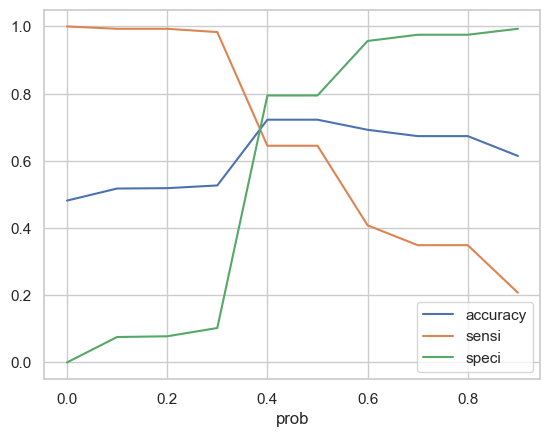

In [109]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.598502,1,1,1,1,1,1,1,0,0,0,0,1
1,0.0,0.308619,0,1,1,1,1,0,0,0,0,0,0,0
2,1.0,0.308619,0,1,1,1,1,0,0,0,0,0,0,0
3,1.0,0.326951,0,1,1,1,1,0,0,0,0,0,0,0
4,1.0,0.959985,1,1,1,1,1,1,1,1,1,1,1,1


In [111]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7224837480385564

In [112]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1837,  475],
       [ 763, 1386]], dtype=int64)

In [113]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.6449511400651465

In [115]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7945501730103807

Cut off point seems good to go

## Making Predictions on The Test Set

In [116]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [117]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,True,False,True,False,False,False,True,False,False,False,True,False,False
6122,0.027888,0.029049,False,False,False,False,False,False,False,False,False,True,False,False,False
9202,0.015936,0.416813,False,False,False,False,False,False,True,False,False,True,False,False,False
6570,0.011952,0.378961,False,False,False,False,True,False,True,False,False,True,False,False,False
2668,0.031873,0.395246,False,False,False,False,False,False,True,False,False,True,False,False,False


In [118]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [119]:
# Checking X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,True,False,True,False,False,False,True,False,False,False,True,False,False
6122,1.0,0.027888,0.029049,False,False,False,False,False,False,False,False,False,True,False,False,False
9202,1.0,0.015936,0.416813,False,False,False,False,False,False,True,False,False,True,False,False,False
6570,1.0,0.011952,0.378961,False,False,False,False,True,False,True,False,False,True,False,False,False
2668,1.0,0.031873,0.395246,False,False,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,False,False,False,False,False,False,True,False,False,True,False,False,False
6583,1.0,0.011952,0.152289,False,False,False,False,False,False,True,False,False,True,False,False,False
5531,1.0,0.055777,0.702025,False,False,False,False,False,False,False,False,False,True,False,False,False
3056,1.0,0.011952,0.417694,False,False,False,False,True,False,True,False,False,True,False,False,False


In [121]:
# Dropping the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], axis= 1, 
                                inplace = True)

In [125]:
# Make predictions on the test set and store it in the variable 'y_test_pred'


X_test = X_test.astype(int)
X_test_sm = sm.add_constant(X_test)

# Make predictions on the test set
y_test_pred = res.predict(X_test_sm)

# Print the first few predictions
print(y_test_pred.head())

4771    0.997055
6122    0.308619
9202    0.598502
6570    0.243137
2668    0.598502
dtype: float64


In [126]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [128]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [129]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.997055
1,0,0.308619
2,0,0.598502
3,1,0.243137
4,1,0.598502


In [132]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [133]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997055
1,0,0.308619
2,0,0.598502
3,1,0.243137
4,1,0.598502


In [134]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [135]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997055,1
1,0,0.308619,0
2,0,0.598502,1
3,1,0.243137,0
4,1,0.598502,1


In [136]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7191422594142259

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2


array([[775, 221],
       [316, 600]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Calculating the 'sensitivity'
TP / float(TP+FN)


0.6550218340611353

In [140]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7781124497991968

### Precision-Recall View

In [141]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1837,  475],
       [ 763, 1386]], dtype=int64)

In [142]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7447608812466416

In [144]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6449511400651465

Precision and recall are close enough

## Making Predictions on test set

In [145]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [146]:
y_test_pred[:10]

4771    0.997055
6122    0.308619
9202    0.598502
6570    0.243137
2668    0.598502
4233    0.831464
3368    0.308619
9091    0.308619
5972    0.598502
3631    0.598502
dtype: float64

In [147]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Let's see the head

y_pred_1.head()

,0
4771,0.997055
6122,0.308619
9202,0.598502
6570,0.243137
2668,0.598502


In [149]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [150]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
# Checking the 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.997055
1,0,0.308619
2,0,0.598502
3,1,0.243137
4,1,0.598502


In [153]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [154]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997055
1,0,0.308619
2,0,0.598502
3,1,0.243137
4,1,0.598502


In [155]:
# Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [156]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997055,1
1,0,0.308619,0
2,0,0.598502,1
3,1,0.243137,0
4,1,0.598502,1


In [157]:
# Let's checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7191422594142259

In [158]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[775, 221],
       [316, 600]], dtype=int64)

In [159]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [160]:
# Calculating the Precision

TP/(TP+FP)


0.730816077953715

In [161]:
# Calculating Recall

TP/(TP+FN)

0.6550218340611353